<a href="https://colab.research.google.com/github/prgmr99/machine_learning-sklearn/blob/main/%EC%98%81%ED%99%94sklearn_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **영화 관객 수 데이터를 활용한 데이터 분석**

감독, 이름, 상영등급, 스태프 수 등의 정보로 영화 관객 수를 예측하는 모델을 만들어 주세요!

# **1. 라이브러리 및 데이터**

### **Library & Data**

In [4]:
import pandas as pd # 판다스 패키지 불러오기
import lightgbm as lgb

In [5]:
# 데이터 불러오기
train=pd.read_csv('/content/drive/MyDrive/머신러닝 기초 연습/movies_train.csv') # 데이터를 읽어올 때는 판다스에서 제공하는 read_csv를 사용.
test=pd.read_csv('/content/drive/MyDrive/머신러닝 기초 연습/movies_test.csv')
submission=pd.read_csv('/content/drive/MyDrive/머신러닝 기초 연습/submission.csv')

# **2. 탐색적 자료분석**

### **Exploratory Data Analysis(EDA)**



**pd.DataFrame.head()**


*   데이터 프레임의 위에서부터 n개 행을 보여주는 함수
*   n의 기본값(default 값)은 5



In [6]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387




*   title: 영화의 제목
*   distributor: 배급사
*   genre: 장르
*   release_time: 개봉일
*   time: 상영시간(분)
*   screening_rat: 상영등급
*   director: 감독이름
*   dir_prev_bfnum: 해당 감독이 이 영화를 만들기 전 제작에 참여한 영황에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
*   dir_prev_num: 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
*   num_staff: 스텝수
*   num_actor: 주연배우수
*   box_off_num: 관객수





In [7]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [8]:
submission.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


### **pd.DataFrame.tail()**



*   데이터 프레임의 아래에서부터 n개 행을 보여주는 함수
*   n의 기본값(default 값)은 5



In [9]:
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


### **pd.DataFrame.shape**


*   데이터 프레임의 행의 개수와 열의 개수가 저장되어 있는 속성(attribute)



In [10]:
print(train.shape)
print(test.shape)
print(submission.shape)

(600, 12)
(243, 11)
(243, 2)


### **pd.DataFrame.info()**


*   데이터셋의 column별 정보를 알려주는 함수
*   비어 있지 않은 값은 (non-null)은 몇개인지?
*   column의 type은 무엇인지?
    *   type의 종류: int(정수), float(실수), object(문자열), 등등(date,..)





In [11]:
train.info() # 7번을 보면 270이다. 추후 모델링에 활용시 대체를 하여 600로 다 채워야된다는 것을 확인할 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [12]:
test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


### **pd.DataFrame.describe()**



*   숫자형(int, float) column들의 기술 통계량을 보여주는 함수
*   기술통계량이란?
    * 해당 column을 대표할 수 있는 통계값들을 의미   

*   기술통계량 종류
    *   count: 해당 column에서 비어 있지 않은 값의 개수
    *   mean: 평균
    *   std: 표준편차
    *   min: 최솟값(이상치 포함)
    *   25% (Q1): 전체 데이터를 순서대로 정렬했을 때, 아래에서부터 1/4번째 지점에 있는 값
    *   50% (Q2): 중앙값(전체 데이터를 순서대로 정렬했을 때, 아래에서부터 2/4번째 지점에 있는 값)
    *   75% (Q3): 전체 데이터를 순서대로 정렬했을 때, 아래에서부터 3/4번째 지점에 있는 값
    *   max: 최댓값(이상치 포함)


*   이상치: 울타리 밖에 있는 부분을 이상치라고 정의함
    *   아래쪽 울타리: *Q1 - 1.5 x IQR*
    *   위쪽 울타리: *Q3 + 1.5 x IQR*
    *   *IQR = Q3 - Q1*




<img src="https://miro.medium.com/max/10125/1*NRlqiZGQdsIyAu0KzP7LaQ.png" width="700" height="500">


In [13]:
train.describe() 

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [14]:
pd.options.display.float_format='{:.1f}'.format

### **pd.DataFrame.groupby()**

*   집단에 대한 통계량 확인


<img src="https://s3.amazonaws.com/files.dezyre.com/images/Tutorials/Split+Apply+Combine+Strategy.png" width="700" height="500">

In [15]:
train[['genre','box_off_num']].groupby('genre').mean().sort_values('box_off_num')

,box_off_num
genre,
뮤지컬,6627.0
다큐멘터리,67172.3
서스펜스,82611.0
애니메이션,181926.7
멜로/로맨스,425968.0
미스터리,527548.2
공포,590832.5
드라마,625689.8
코미디,1193914.0



*   상관계수: 두 개의 변수가 같이 일어나는 강도를 나타내는 수치
*   -1에서 1사이의 값을 지닙니다.
*   -1이나 1인 수치는 현실 세계에서 관측되기 힘든 수치입니다.
*   분야별로 기준을 정하는 것에 따라 달라지겠지만, 보통 0.4이상이면 두 개의 변수 간에 상관성이 있다고 얘기합니다.

![상관계수](https://t1.daumcdn.net/cfile/tistory/99DEE1425C6A9F2008)




*   상관관계는 인과관계와 다르다. 아래 예시 확인

![상관성 예시](https://miro.medium.com/max/684/1*JLYI5eCVEN7ZUWXBIrrapw.png)




- 선글라스 판매량이 증가함에 따라, 아이스크림 판매액도 같이 증가하는 것을 볼 수 있습니다. 
- 하지만 선글라스 판매량이 증가했기 **때문에** 아이스크림 판매액이 증가했다라고 해석하는 것은 타당하지 않습니다. 
- 선글라스 판매량이 증가했다는 것은 여름 때문이라고 볼 수 있으므로, 날씨가 더워짐에 따라 선글라스 판매량과 아이스크림 판매액이 같이 증가했다고 보는 것이 타당할 것입니다. 

### **pd.DataFrame.corr()**


*   correlation coefficient 의 줄임말

In [16]:
pd.reset_option('display.float_format')

In [17]:
train.corr()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
time,1.000000,0.264675,0.306727,0.623205,0.114153,0.441452
dir_prev_bfnum,0.264675,1.000000,0.131822,0.323521,0.083818,0.283184
dir_prev_num,0.306727,0.131822,1.000000,0.450706,0.014006,0.259674
num_staff,0.623205,0.323521,0.450706,1.000000,0.077871,0.544265
num_actor,0.114153,0.083818,0.014006,0.077871,1.000000,0.111179
box_off_num,0.441452,0.283184,0.259674,0.544265,0.111179,1.000000


In [18]:
import seaborn as sns

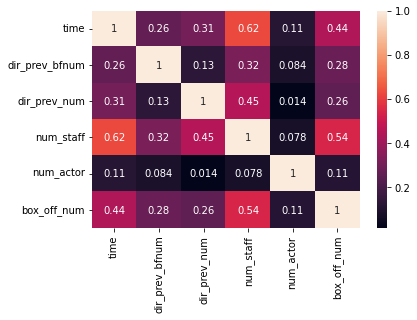

In [19]:
sns.heatmap(train.corr(), annot=True)

# **3. 데이터 전처리**

### **pd.Series.isna()**



*   결측치 여부를 확인해줍니다.
*   결측치면 True, 아니면 False



In [20]:
train.isna()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
595,False,False,False,False,False,False,False,False,False,False,False,False
596,False,False,False,False,False,False,False,False,False,False,False,False
597,False,False,False,False,False,False,False,True,False,False,False,False
598,False,False,False,False,False,False,False,True,False,False,False,False


In [21]:
train.isna().sum()  # False = 0, True = 1
# 즉, 결측값이 있는 것들은 1로 표현되고 1들이 모두 더해져서 몇개가 있는지 알 수 있다.
# 아래에 fillna 함수를 이용해 결측값을 없애주었다.

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [22]:
train.isna().sum()/600  # 총 600개이기 때문에 나눠서 몇 퍼센트인지 확인할 수 있다.
# 아래에 fillna 함수를 이용해 결측값을 없애주었다.

title             0.00
distributor       0.00
genre             0.00
release_time      0.00
time              0.00
screening_rat     0.00
director          0.00
dir_prev_bfnum    0.55
dir_prev_num      0.00
num_staff         0.00
num_actor         0.00
box_off_num       0.00
dtype: float64

In [23]:
train # 데이터를 볼 수 있다.

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


In [24]:
train[train['dir_prev_bfnum'].isna()] # 결측값들이 있는 데이터만 따로 추출하기. 해당 column 선택하기. isna() true 반환 -> 다시 인덱싱

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745
...,...,...,...,...,...,...,...,...,...,...,...,...
593,낭만파 남편의 편지,퍼스트런,미스터리,2013-09-12,97,청소년 관람불가,최위안,NaN,0,5,3,1132
594,오빠가 돌아왔다,(주)마운틴픽쳐스,코미디,2014-03-20,94,청소년 관람불가,노진수,NaN,0,37,5,1958
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


In [25]:
train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum()

0

In [26]:
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


### **pd.DataFrame.fillna()**


*   결측치를 채우고자 하는 column과 결측치를 대신하여 넣고자 하는 값을 명시해주어야 합니다.
*   범주형 변수일 경우, 최빈값으로 대체할 수 있습니다.



In [27]:
train['dir_prev_bfnum'].fillna(0,inplace=True) # inplace을 넣어야 저장까지 해준다.

In [28]:
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,0.00,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,0.00,0,431,4,2192525


In [29]:
test['dir_prev_bfnum'].fillna(0,inplace=True) # 테스트셋에도 결측값이 존재하기 때문에 0으로 다 채워준다.

In [30]:
test[test['dir_prev_bfnum'].isna()]['dir_prev_num'].sum()

0

# **변수 선택 및 모델 구축**
# **Feature Engineering & Initial Modeling**

In [31]:
# X(상영 시간, 영화 제작에 참여한 스탭수, 배우 수...) -> MODEL -> y(영화 관객 수)  y를 모델을 통해서 산출한다. y(영화 관객수)를 산출하기 위해 사용하는 변수를 정해야 한다.

In [32]:
# 모델 선언
model=lgb.LGBMRegressor(random_state=777,n_estimators=1000) 
# random_state = 어느 컴퓨터에서 작업하든 똑같은 결과를 산출하기 위해 값을 고정시켜놓은 것.
# n_estimators = lightgbm 모델 특성상 이 파라미터가 들어간다. 순차적인 모델을 1000개 만들겠다.

## LightGBM


*   부스팅 모델
*   기존 모델이 못 맞춘 문제에 가중치를 두어 지속적으로 학습 이어나감
*   타 부스팅 모델에 비해 속도가 빠름

Sequential

![부스팅](https://quantdare.com/wp-content/uploads/2016/04/bb3.png)



In [33]:
features=['time','dir_prev_num','num_staff','num_actor'] # 모델에 넣을 입력값인 features라는 변수에 저 4가지를 넣음.
target=['box_off_num'] # 예측값을 target에 저장.

In [34]:
X_train,X_test,y_train=train[features],test[features],train[target]

# **5. 모델 학습 및 검증**
# **Model Tuning & Evaluation**

a. lightGBM (base model)

b. k-fold lightGBM (k-fold model)

c. feature engineering (fe)

d. grid search (hyperparameter tuning)

In [35]:
# 일반적으로 a에서 d로 갈수록 모델의 성능이 좋아진다.

In [36]:
model.fit(X_train,y_train)

LGBMRegressor(n_estimators=1000, random_state=777)

In [37]:
singleLGBM=submission.copy()

In [41]:
singleLGBM.head() # 관객수에 음수가 들어가있는 것을 보아 성능이 안좋을 것으로 예측됨.

,title,box_off_num
0,용서는 없다,2.817995e+06
1,아빠가 여자를 좋아해,3.753772e+05
2,하모니,-5.693243e+05
3,의형제,1.581189e+06
4,평행 이론,-5.277806e+05


In [39]:
singleLGBM['box_off_num']=model.predict(X_test)

In [40]:
singleLGBM.to_csv('singleLGBM.csv',index=False)

## **k-fold 교차검증 (k-fold cross validation)**


*   과대적합 방지
*   모델 간 일반적인 성능 비교
*   validation set, development set

![교차검증](https://mblogthumb-phinf.pstatic.net/MjAxOTA3MjVfMTYz/MDAxNTY0MDY1ODk4NTM0.HiTh5fw3_Fulbq6dv1iLrxS7EmEM4htsWC-5fh-TiGAg.5rbp2nHtWYOZvzoN-Kl4mCKF4nZ4rd5bmO_IDh-sieAg.PNG.ckdgus1433/image.png?type=w800)

주어진 데이터셋을 쪼갠다.

예를 들어 5등분으로 쪼갠다면 처음(Accuracy1)은 주황색 4개로 훈련을 하고 마지막 초록색으로 테스트를 한다. 이런 방식으로 진행한다.

n등분한 데이터를 각각 하나씩 훈련에 사용하지않고 모델의 성능을 검증할 때, 테스트에 사용.

1. 과대적합 방지 - 피드백되어 모델을 계속 튜닝하여 테스트셋에 모델이 과적합될 수가 있다.

임시적인 테스트셋(초록색 부분)을 만들어 자체적으로 검증을 하므로써 최종적인 테스트셋에 조금 더 일반화된 모델을 만들 수 있다.

3. 초록색 부분을 validation set, development set이라고 한다.

In [42]:
from sklearn.model_selection import KFold 

In [43]:
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,0.00,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,0.00,0,431,4,2192525


In [44]:
# 위의 순서가 아니라 셔플을 하고 난 다음 원하는 개수만큼 잘라서 진행한다.
# 일반적으로 셔플 사용을 많이 한다.
# 이론적으로 데이터가 생성된 순서에 의한 영향이 있을 수 있기 때문에 셔플을 한다.
k_fold=KFold(n_splits=5,shuffle=True, random_state=777)

In [53]:
for train_idx,val_idx in k_fold.split(X_train):
  #print(train_idx,val_idx)  # 인덱스로 표현(훈련 데이터셋, 테스트 데이터 셋)
  print(len(train_idx),len(val_idx)) # 개수로 표현
  break

  # 5등분했다는 것을 알 수 있다.

480 120


In [54]:
model=lgb.LGBMRegressor(random_state=777,n_estimators=1000)

models=[]

for train_idx,val_idx in k_fold.split(X_train):
  x_t=X_train.iloc[train_idx]
  y_t=y_train.iloc[train_idx]
  x_val=X_train.iloc[val_idx]
  y_val=y_train.iloc[val_idx]

  models.append(model.fit(x_t,y_t,eval_set=(x_val,y_val),early_stopping_rounds=100,verbose=100))
  # 초록색(validation) 데이터는 eval_set=(x_val,y_val). 소괄호로 묶어서 eval_set에 넣어준다.
  # 트레셋은 x_t, y_t로 넣어주면 된다.
  # early_stopping_rounds: 너무 많이 검증하는 것을 방지하기 위해서 -> 과적합이 될 수 있다. -> 학습을 중단시킬 필요가 있다.
  # verbose: 100번째 모델마다 모델의 성능에 대한 산출값을 출력해준다.

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 2.70572e+12
Early stopping, best iteration is:
[6]	valid_0's l2: 2.45438e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 3.90847e+12
Early stopping, best iteration is:
[33]	valid_0's l2: 3.72825e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 3.50344e+12
Early stopping, best iteration is:
[8]	valid_0's l2: 2.58737e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 1.45977e+12
Early stopping, best iteration is:
[11]	valid_0's l2: 1.26226e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 1.77214e+12
Early stopping, best iteration is:
[22]	valid_0's l2: 1.57631e+12


In [58]:
models # 5개의 모델이 저장되어있다.

[LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777)]

In [59]:
# 모델별로 예측을 한다.
preds=[]
for model in models:
  preds.append(model.predict(X_test))
len(preds)

# X_test에 대한 값을 예측하고 그 값을 preds에 저장한다.

5

In [60]:
kfoldLightGBM=submission.copy()

In [62]:
preds

[array([3367422.08211024,  961138.88337016, 1097929.67851313,
        2097270.81999921,  781476.31131047,  123133.23396977,
          84085.01896248,  199222.92670303,  124854.97973097,
        1072684.78820647,  657040.55769984, 1644701.47160779,
         924735.72080619,  191699.58415836,  723218.39948755,
        2395613.42888462,  113180.54906592, 1882765.92812296,
          97286.47282983,  417270.42113431,  161482.3367577 ,
          63495.73363115,  598057.42337284,  249411.25868881,
         308424.71884273, 1319518.60852241,  202273.52740684,
        1076683.13768137,  491636.41945325,  183406.6380314 ,
        1740233.45816734,   86696.17528125,  440430.29773088,
        2040944.13061099,  113375.45695331,  531746.29484356,
         106207.35971699,  169560.79581187,  158101.0895316 ,
          95037.29701059,  466355.50624629,  197548.63265325,
         198810.0901353 ,  682743.4340129 ,  679265.22397749,
         617812.91125278,  219182.85833837,   83712.10602149,
        

In [63]:
# 5세트의 preds가 있다. -> 이것들을 평균을 낸다.
# 평균을 내기 위해서 numpy의 mean함수를 사용한다.

In [64]:
import numpy as np
kfoldLightGBM['box_off_num']=np.mean(preds, axis=0)

In [68]:
kfoldLightGBM.to_csv('kfoldLightGBM.csv', index=False)
# index=False옵션은 위의 출력된 데이터프레임에 자동으로 추가된 인덱스 없이 저장해준다.

In [66]:
kfoldLightGBM.head()

,title,box_off_num
0,용서는 없다,3.367422e+06
1,아빠가 여자를 좋아해,9.611389e+05
2,하모니,1.097930e+06
3,의형제,2.097271e+06
4,평행 이론,7.814763e+05


## **feature engineering**

In [72]:
# 특징 변수들 추가하기.
features

['time', 'dir_prev_num', 'num_staff', 'num_actor']

In [70]:
train.columns

Index(['title', 'distributor', 'genre', 'release_time', 'time',
       'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor', 'box_off_num'],
      dtype='object')

In [89]:
train.genre # 모델을 입력할 때는 모두 숫자로 변환된 상태여야 해서 일단은 문제가 있다.

0      10
1       2
2      10
3      11
4      11
       ..
595     4
596     4
597     1
598     2
599    10
Name: genre, Length: 600, dtype: int64

In [87]:
from sklearn import preprocessing

In [97]:
le=preprocessing.LabelEncoder()
train['genre']=le.fit_transform(train['genre']) # fit_transform -> 각각의 문자열이 고유의 숫자를 갖게 된다. -> fit 학습하다.

In [90]:
train['genre'] # 숫자로 변환된 것을 확인할 수 있다.

0      10
1       2
2      10
3      11
4      11
       ..
595     4
596     4
597     1
598     2
599    10
Name: genre, Length: 600, dtype: int64

In [98]:
test['genre']=le.transform(test['genre']) # 위에서 fit(학습)을 해서 각각의 문자열에 대해 고유한 수를 얻었으니 또 학습할 필요가 없어 fit을 빼준다.
# 그리고 train에서 학습된 숫자와 다른 숫자를 얻을 수 있기 때문에 transform 사용

In [99]:
features=['time','dir_prev_num','num_staff','num_actor','dir_prev_bfnum','genre']

In [100]:
X_train,X_test,y_train=train[features], test[features],train[target]

In [101]:
model=lgb.LGBMRegressor(random_state=777,n_estimators=1000)

models=[]

for train_idx,val_idx in k_fold.split(X_train):
  x_t=X_train.iloc[train_idx]
  y_t=y_train.iloc[train_idx]
  x_val=X_train.iloc[val_idx]
  y_val=y_train.iloc[val_idx]

  models.append(model.fit(x_t,y_t,eval_set=(x_val,y_val),early_stopping_rounds=100,verbose=100))

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 2.62067e+12
Early stopping, best iteration is:
[9]	valid_0's l2: 2.42668e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 4.39227e+12
Early stopping, best iteration is:
[23]	valid_0's l2: 3.97173e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 3.29841e+12
Early stopping, best iteration is:
[10]	valid_0's l2: 2.53643e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 1.56499e+12
Early stopping, best iteration is:
[16]	valid_0's l2: 1.21201e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 1.60118e+12
Early stopping, best iteration is:
[29]	valid_0's l2: 1.47528e+12


In [103]:
preds=[]
for model in models:
  preds.append(model.predict(X_test))

len(preds)

5

In [104]:
feLightGBM=submission.copy()

In [105]:
feLightGBM['box_off_num']=np.mean(preds, axis=0)

In [107]:
feLightGBM.to_csv('feLightGBM.csv', index=False)

## **Grid Search**

모델 튜닝하기

아래의 막대 하나가 각각의 모델.
오차률이 가장 낮은 모델을 찾는 것.

![그리드서치](https://trello-attachments.s3.amazonaws.com/5e0d387cd4f8ba5e8f790d8b/5e634450ee4a88284a40a05a/3e9490f6010aa32e74bfde07398ac603/image.png)

In [108]:
from sklearn.model_selection import GridSearchCV

In [112]:
model=lgb.LGBMRegressor(random_state=777, n_estimators=1000) #LGBMRegressor의 옵션들이 바뀔 때마다 성능이 차이날 수 있다.

# 파라미터 조합을 사용하여 튜닝한다.
params={
    'learning_rate': [0.1,0.01,0.003],
    'min_child_samples':[20,30]}

# GridSearch 사용법 
gs=GridSearchCV(estimator=model,    # estimator에 우리가 생성한 모델을 넣어준다.
                param_grid=params,  # param_grid에 우리가 실험해보고자 하는 파라미터 조합을 넣어준다.
                scoring='neg_mean_squared_error',  # 평가지표. 위 그림의 좌측에 해당하는 지표
                cv=k_fold)  # cv cross validation -> 앞서 선언한 k_fold를 그냥 넣어줘도 되고 그냥 5를 넣어줘도 된다.

In [113]:
gs.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=777, shuffle=True),
             estimator=LGBMRegressor(n_estimators=1000, random_state=777),
             param_grid={'learning_rate': [0.1, 0.01, 0.003],
                         'min_child_samples': [20, 30]},
             scoring='neg_mean_squared_error')

In [115]:
gs.best_params_ # 가장 좋았던 조합

{'learning_rate': 0.003, 'min_child_samples': 30}

In [117]:
# 위의 파마미터 값들을 추가해 새로운 모델을 생성한다.
model=lgb.LGBMRegressor(random_state=777,n_estimators=1000,learning_rate=0.003,min_child_samples=30)

models=[]

for train_idx,val_idx in k_fold.split(X_train):
  x_t=X_train.iloc[train_idx]
  y_t=y_train.iloc[train_idx]
  x_val=X_train.iloc[val_idx]
  y_val=y_train.iloc[val_idx]

  models.append(model.fit(x_t,y_t,eval_set=(x_val,y_val),early_stopping_rounds=100,verbose=100))

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 2.56673e+12
[200]	valid_0's l2: 2.45583e+12
[300]	valid_0's l2: 2.42575e+12
[400]	valid_0's l2: 2.43392e+12
Early stopping, best iteration is:
[335]	valid_0's l2: 2.42348e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 4.89194e+12
[200]	valid_0's l2: 4.40922e+12
[300]	valid_0's l2: 4.19146e+12
[400]	valid_0's l2: 4.05951e+12
[500]	valid_0's l2: 3.96931e+12
[600]	valid_0's l2: 3.91727e+12
[700]	valid_0's l2: 3.88462e+12
[800]	valid_0's l2: 3.87695e+12
[900]	valid_0's l2: 3.87088e+12
Early stopping, best iteration is:
[876]	valid_0's l2: 3.87035e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 3.14361e+12
[200]	valid_0's l2: 2.79286e+12
[300]	valid_0's l2: 2.59302e+12
[400]	valid_0's l2: 2.47608e+12
[500]	valid_0's l2: 2.40386e+12
[600]	valid_0's l2: 2.36407e+12
[700]	valid_0's l2: 2.38505e+12
Early stopping, best iteration is:
[6

In [118]:
preds=[]
for model in models:
  preds.append(model.predict(X_test))

In [119]:
gs.best_score_

-2334525343085.6494

In [120]:
gslgbm=submission.copy()

In [121]:
gslgbm['box_off_num']=np.mean(preds, axis=0)

In [122]:
gslgbm.to_csv('gslgbm.csv', index=False)